# Import the necessary library and the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('UpdatedResumeDataSet.csv')
data.head(20)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


# Look and visualize at the categories

In [2]:
data.shape

(962, 2)

In [3]:
print(data['Category'].unique())

print("total unique category: {}". format(len(data['Category'].unique())))

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
total unique category: 25


In [4]:
resume_ctg = data[['Category']].value_counts().reset_index().rename(columns={0:'Count'})
resume_ctg

,Category,Count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Data Science,40
8,Operations Manager,40
9,Sales,40


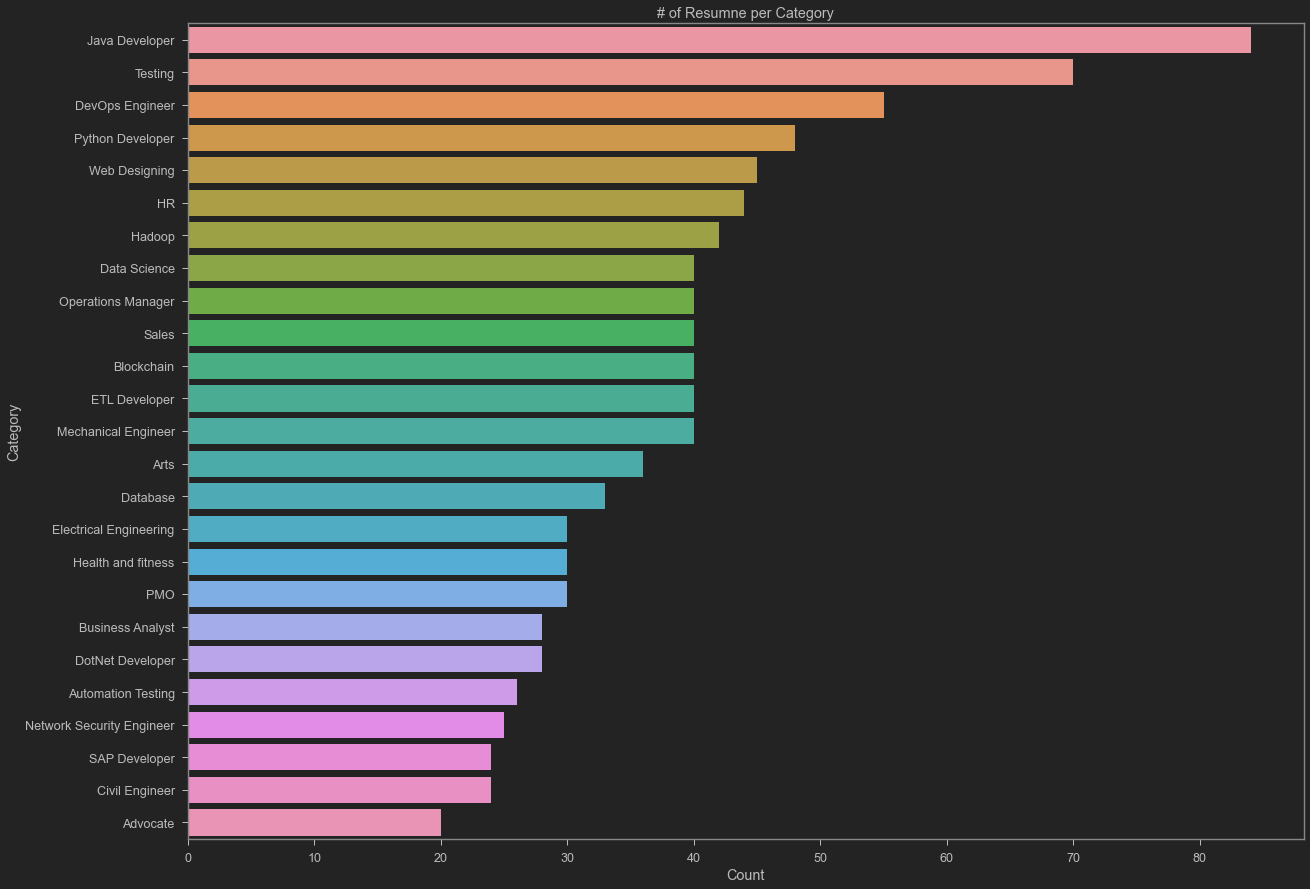

In [5]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.barplot(x='Count', y="Category",data=resume_ctg)
plt.title('# of Resumne per Category')
plt.show()

# visualize the distribution of categories

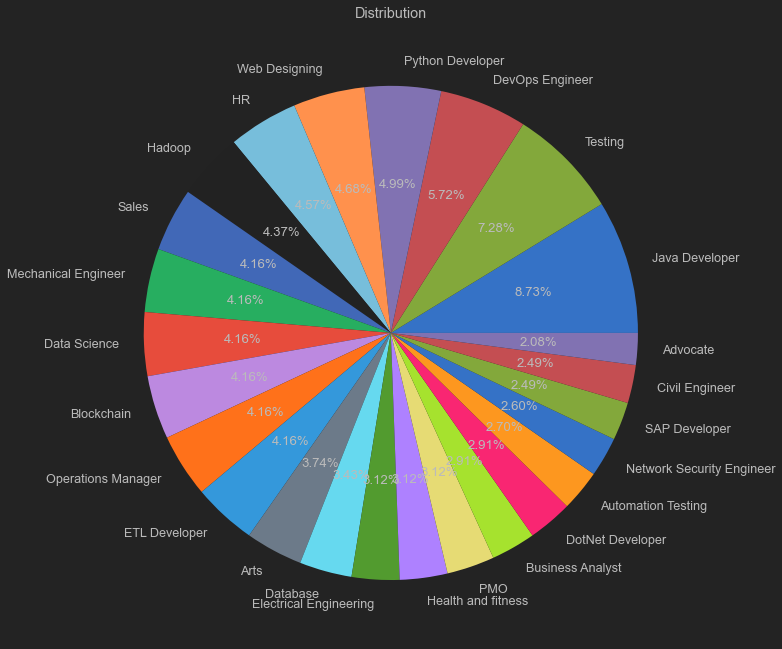

In [6]:
from matplotlib.gridspec import GridSpec
count=data['Category'].value_counts()
label=data['Category'].value_counts().keys()

plt.figure(1, figsize=(25,25))
grid=GridSpec(2,2)

cmap=plt.get_cmap('coolwarm')

color=[cmap(i) for i in np.linspace(0, 1, 5)]
plt.subplot(grid[0,1], aspect=1, title='Distribution')

pie=plt.pie(count, labels=label, autopct='%1.2f%%')
plt.show()

# remove the URLs, hashtags, mentions, special letters, and punctuations

In [7]:
import re

def clean(text):
    text=re.sub('http\S+\s*', ' ', text)
    text=re.sub('RT|cc', ' ', text)
    text=re.sub('#\S+', '', text)
    text=re.sub('@\S+', '', text)
    text=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text=re.sub('\s+', ' ', text)
    text=re.sub(r'[^\x00-\x7f]', r' ', text)
    return text

data['clean text']=data.Resume.apply(lambda x: clean(x))

In [8]:
data['clean text']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills     R     Python     SAP HANA     Table...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills     Proficient in MS office Wo...
958        Willingness to a ept the challenges     Po...
959    PERSONAL SKILLS     Quick learner     Eagernes...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: clean text, Length: 962, dtype: object

# Plot Word cloud image

In [9]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwords=set(stopwords.words('english')+['``',"''"])

total_words=[]
sentences=data['Resume'].values
cleanSentences =""

for i in range(0,200):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)
            
word_freq_dist=nltk.FreqDist(total_words)
most_common=word_freq_dist.most_common(100)

print(most_common)

[('Details', 609), ('Exprience', 580), ('months', 478), ('company', 459), ('description', 427), ('1', 384), ('Project', 269), ('year', 261), ('January', 253), ('Maharashtra', 244), ('6', 225), ('Less', 224), ('data', 223), ('project', 212), ('Skill', 206), ('Data', 203), ('Web', 196), ('application', 192), ('Education', 177), ('I', 174), ('time', 169), ('College', 168), ('Python', 156), ('Science', 154), ('Pune', 154), ('Used', 152), ('Software', 151), ('Engineering', 147), ('The', 146), ('University', 140), ('like', 139), ('Nagpur', 138), ('C', 137), ('SQL', 136), ('monthsCompany', 134), ('Roles', 134), ('B', 132), ('Responsibility', 130), ('developed', 128), ('Technologies', 127), ('2', 123), ('India', 122), ('Designed', 121), ('website', 120), ('Machine', 118), ('UI', 117), ('Learning', 116), ('Developer', 116), ('Mumbai', 115), ('using', 114), ('24', 111), ('Database', 110), ('development', 105), ('Description', 103), ('Responsibilities', 100), ('S', 100), ('A', 99), ('BOOTSTRAP', 

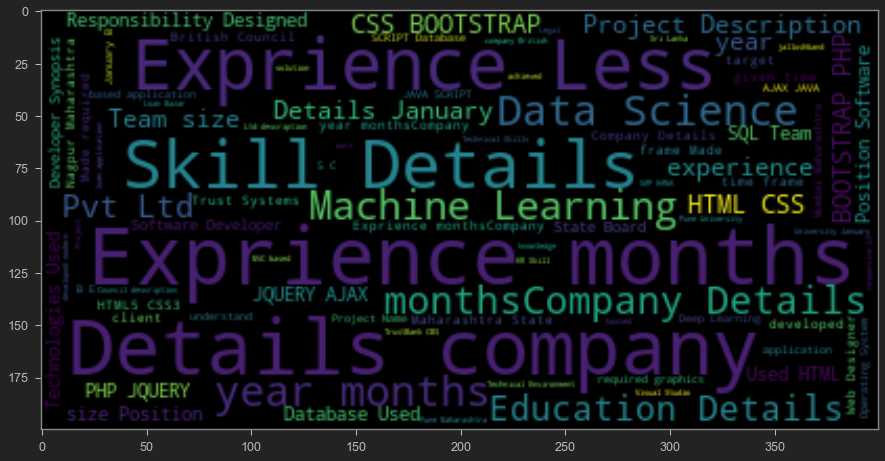

In [10]:
WC=WordCloud().generate(cleanSentences)
plt.figure(figsize=(15,15))
plt.imshow(WC, interpolation='bilinear')
plt.show()

# Training Machine Learning Model

In [11]:
from sklearn.preprocessing import LabelEncoder

var=['Category']
le=LabelEncoder()

for i in var:
    data[i]=le.fit_transform(data[i])

In [12]:
data

,Category,Resume,clean text
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Wo...
958,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Po...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagernes...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

text=data['clean text'].values
terget=data['Category'].values

vect=TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=2000)

vect.fit(text)

Word_feature=vect.transform(text)



In [14]:
Word_feature

<962x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 123286 stored elements in Compressed Sparse Row format>

In [15]:
x_train, x_test, y_train, y_test=train_test_split(Word_feature, terget, random_state=0, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(769, 2000)
(193, 2000)


In [16]:
import sklearn
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier

model = OneVsOneClassifier(KNeighborsClassifier())
model.fit(x_train, y_train)

OneVsOneClassifier(estimator=KNeighborsClassifier())

In [17]:
prediction=model.predict(x_test)

In [18]:
print("training Score: {:.2f}".format(model.score(x_train, y_train)))
print("test Score: {:.2f}".format(model.score(x_test, y_test)))

training Score: 0.99
test Score: 0.99


In [19]:
from sklearn import metrics
print("model report: %s: \n %s\n" % (model, metrics.classification_report(y_test, prediction)))

model report: OneVsOneClassifier(estimator=KNeighborsClassifier()): 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        19
          1